Aditya Arun Patil

In [ ]:
pip install pmdarima

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima  # Import auto_arima from pmdarima
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


# -------------------------------------------
# 1. Load and Inspect the Dataset
# -------------------------------------------

# Load the dataset
file_path = "Ev Sales.xlsx"
df = pd.read_excel(file_path, sheet_name='Sheet1')

# Display the first few rows
print("Dataset Preview:")
display(df.head())

# Check for missing values
print("\nMissing Values:")
display(df.isnull().sum())

# Convert 'YEAR' column to datetime format if it's not already
if df['YEAR'].dtype != 'datetime64[ns]':
    df['YEAR'] = pd.to_datetime(df['YEAR'], format='%Y')

# Set 'YEAR' as the index for time series analysis
df.set_index('YEAR', inplace=True)

# Summary statistics
print("\nSummary Statistics:")
display(df.describe())



Dataset Preview:


,YEAR,2 W,3 W,4 W,BUS,TOTAL
0,2017-04-01,96,4748,198,0,5042
1,2017-05-01,91,6720,215,2,7028
2,2017-06-01,137,7178,149,1,7465
3,2017-07-01,116,8775,120,0,9011
4,2017-08-01,99,8905,137,0,9141



Missing Values:


,0
YEAR,0
2 W,0
3 W,0
4 W,0
BUS,0
TOTAL,0



Summary Statistics:


,2 W,3 W,4 W,BUS,TOTAL
count,74.000000,74.000000,74.000000,74.000000,74.000000
mean,16938.729730,14851.351351,1272.567568,82.310811,33144.959459
std,25846.636971,11002.517635,1841.195763,79.696672,38251.453387
min,85.000000,668.000000,3.000000,0.000000,958.000000
25%,1304.250000,7782.250000,187.750000,11.250000,9147.000000
50%,3014.500000,10619.500000,317.500000,74.500000,14526.000000
75%,23599.000000,18641.750000,1545.000000,113.500000,43902.750000
max,105154.000000,45225.000000,8852.000000,331.000000,157788.000000


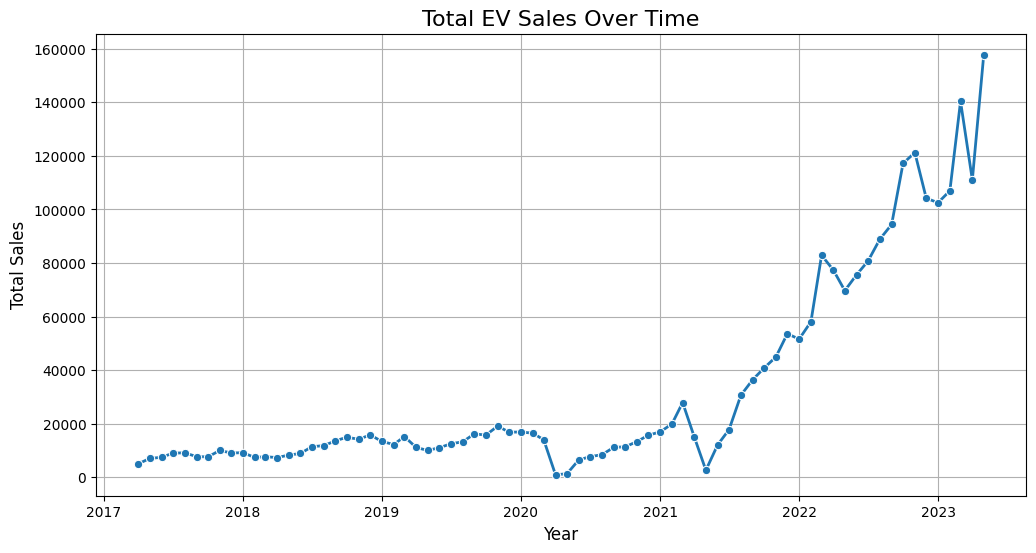

In [ ]:


# -------------------------------------------
# 2. Time Series Analysis and Visualization
# -------------------------------------------

## 2.1 Total EV Sales Over Time
plt.figure(figsize=(12,6))
sns.lineplot(data=df['TOTAL'], marker='o', linewidth=2)
plt.title('Total EV Sales Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.grid(True)
plt.show()



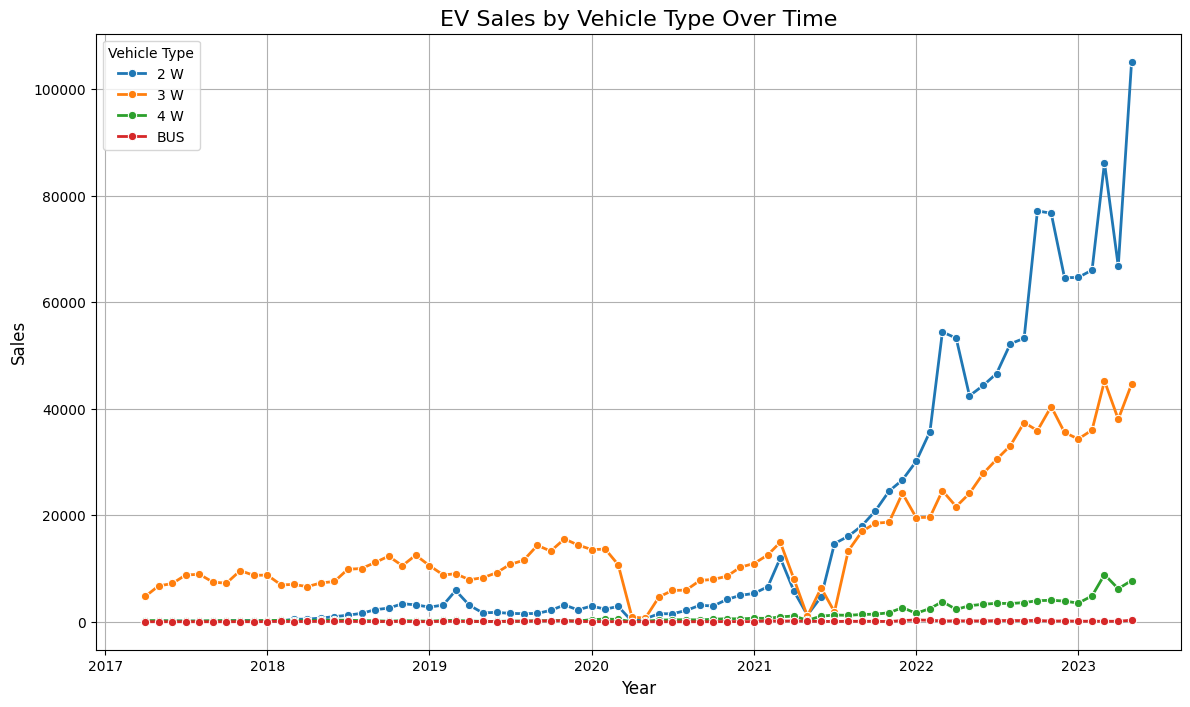

In [ ]:
## 2.2 EV Sales by Vehicle Type Over Time
plt.figure(figsize=(14,8))
for column in ['2 W', '3 W', '4 W', 'BUS']:
    sns.lineplot(data=df[column], marker='o', linewidth=2, label=column)
plt.title('EV Sales by Vehicle Type Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.legend(title='Vehicle Type')
plt.grid(True)
plt.show()

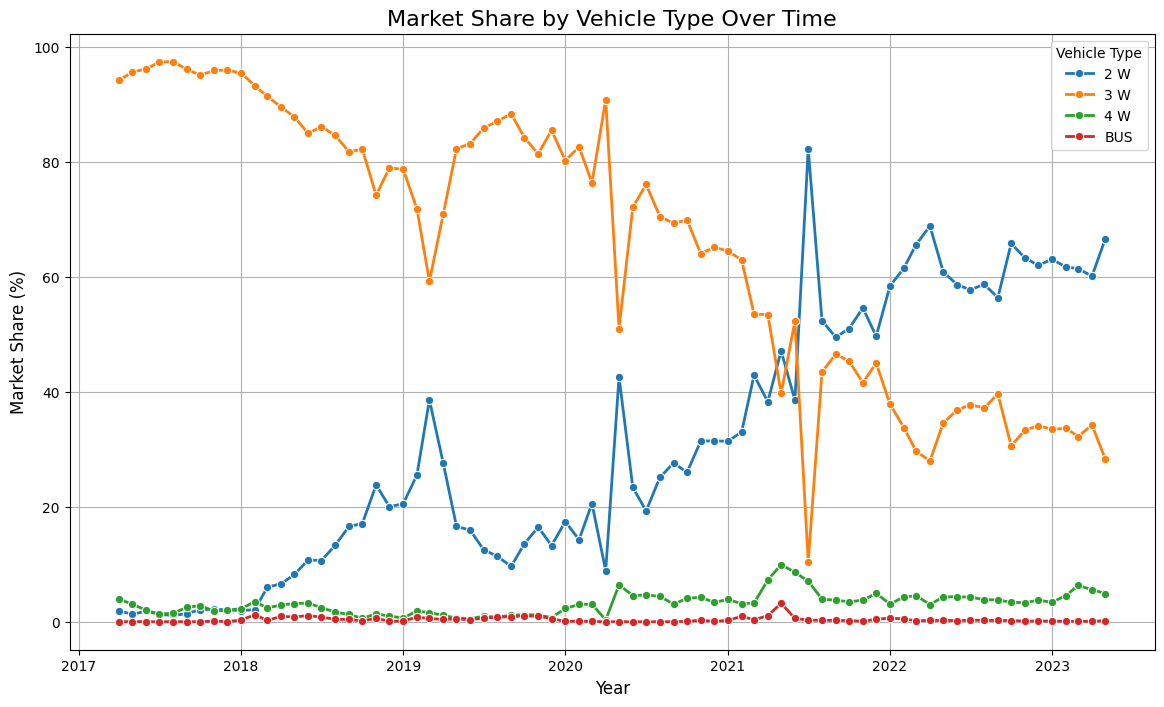

In [ ]:
## 2.3 Market Share of Each Vehicle Type Over Time
market_share = df[['2 W', '3 W', '4 W', 'BUS']].div(df['TOTAL'], axis=0) * 100
plt.figure(figsize=(14,8))
for column in market_share.columns:
    sns.lineplot(data=market_share[column], marker='o', linewidth=2, label=column)
plt.title('Market Share by Vehicle Type Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Market Share (%)', fontsize=12)
plt.legend(title='Vehicle Type')
plt.grid(True)
plt.show()

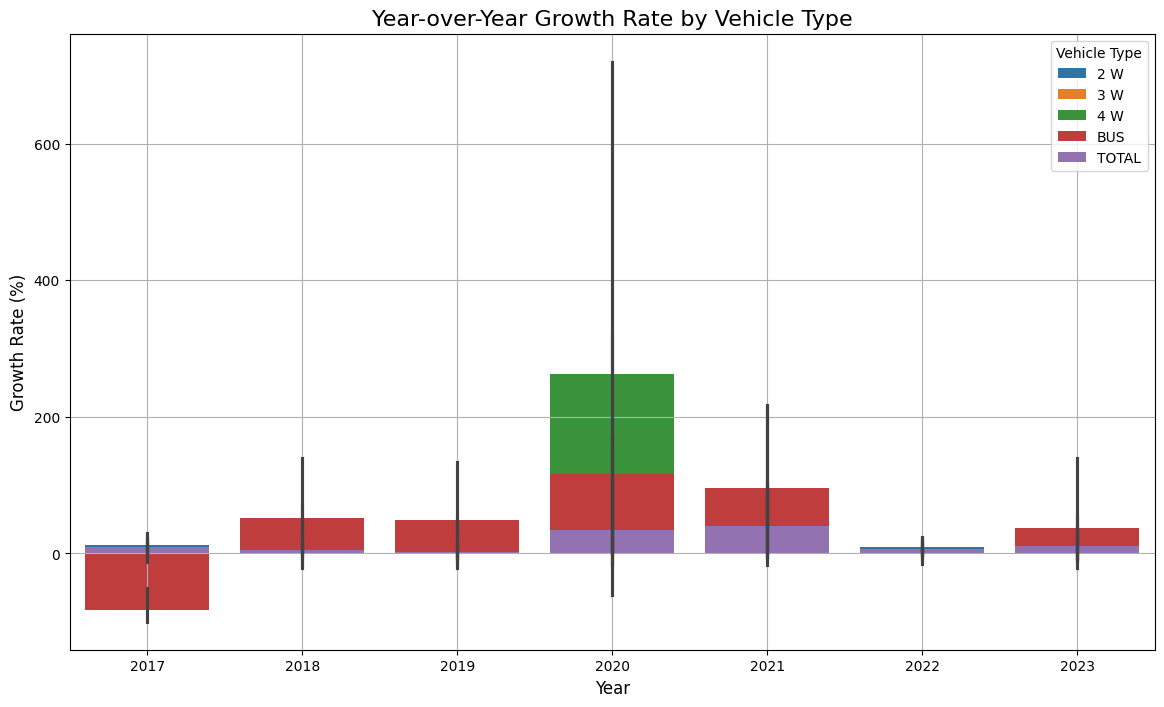

In [ ]:
## 2.4 Year-over-Year Growth Rate
growth_rate = df[['2 W', '3 W', '4 W', 'BUS', 'TOTAL']].pct_change() * 100
plt.figure(figsize=(14,8))
for column in growth_rate.columns:
    sns.barplot(x=growth_rate.index.year, y=growth_rate[column], label=column)
plt.title('Year-over-Year Growth Rate by Vehicle Type', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Growth Rate (%)', fontsize=12)
plt.legend(title='Vehicle Type')
plt.grid(True)
plt.show()

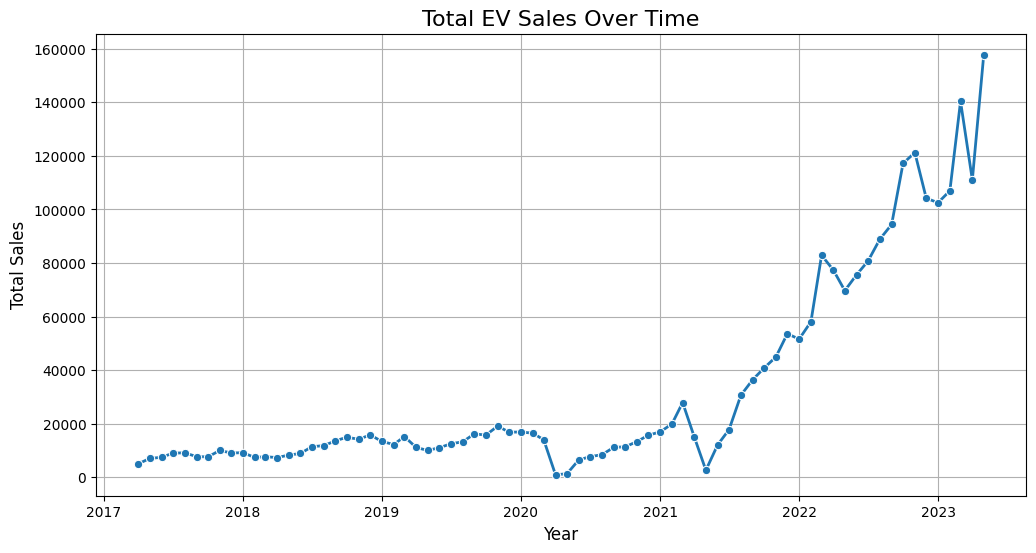

In [ ]:


# -------------------------------------------
# 2. Time Series Analysis and Visualization
# -------------------------------------------

## 2.1 Total EV Sales Over Time
plt.figure(figsize=(12,6))
sns.lineplot(data=df['TOTAL'], marker='o', linewidth=2)
plt.title('Total EV Sales Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.grid(True)
plt.show()

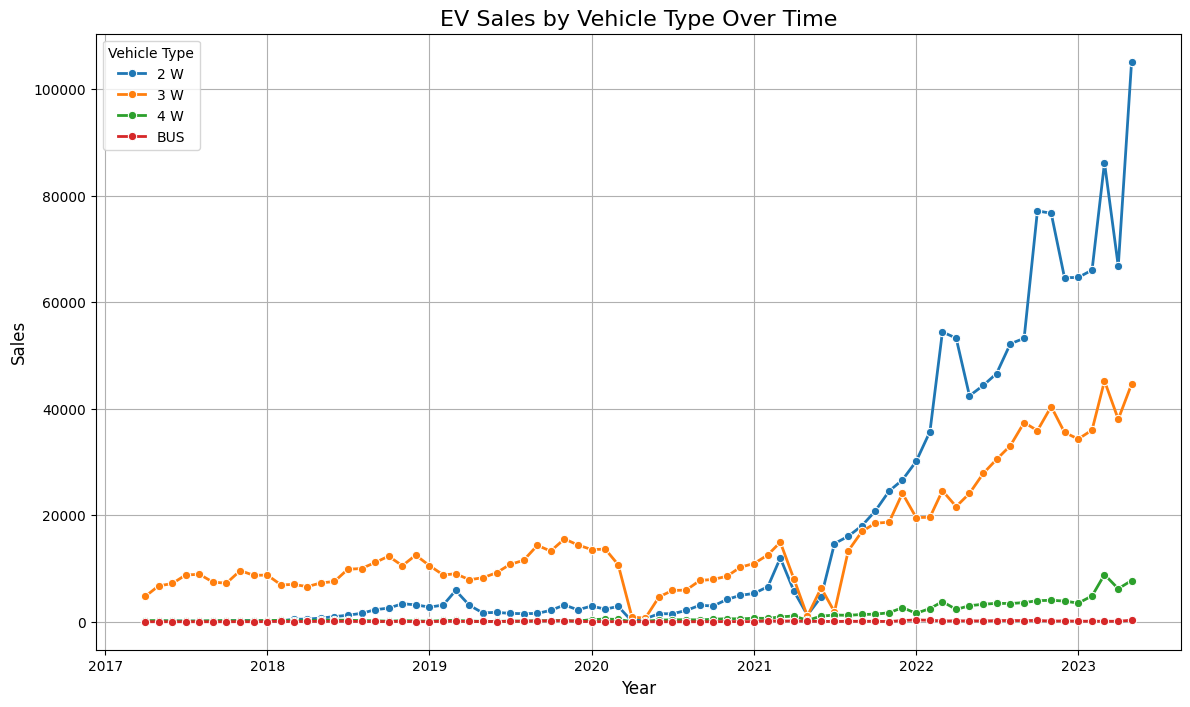

In [ ]:

## 2.2 EV Sales by Vehicle Type Over Time
plt.figure(figsize=(14,8))
for column in ['2 W', '3 W', '4 W', 'BUS']:
    sns.lineplot(data=df[column], marker='o', linewidth=2, label=column)
plt.title('EV Sales by Vehicle Type Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.legend(title='Vehicle Type')
plt.grid(True)
plt.show()

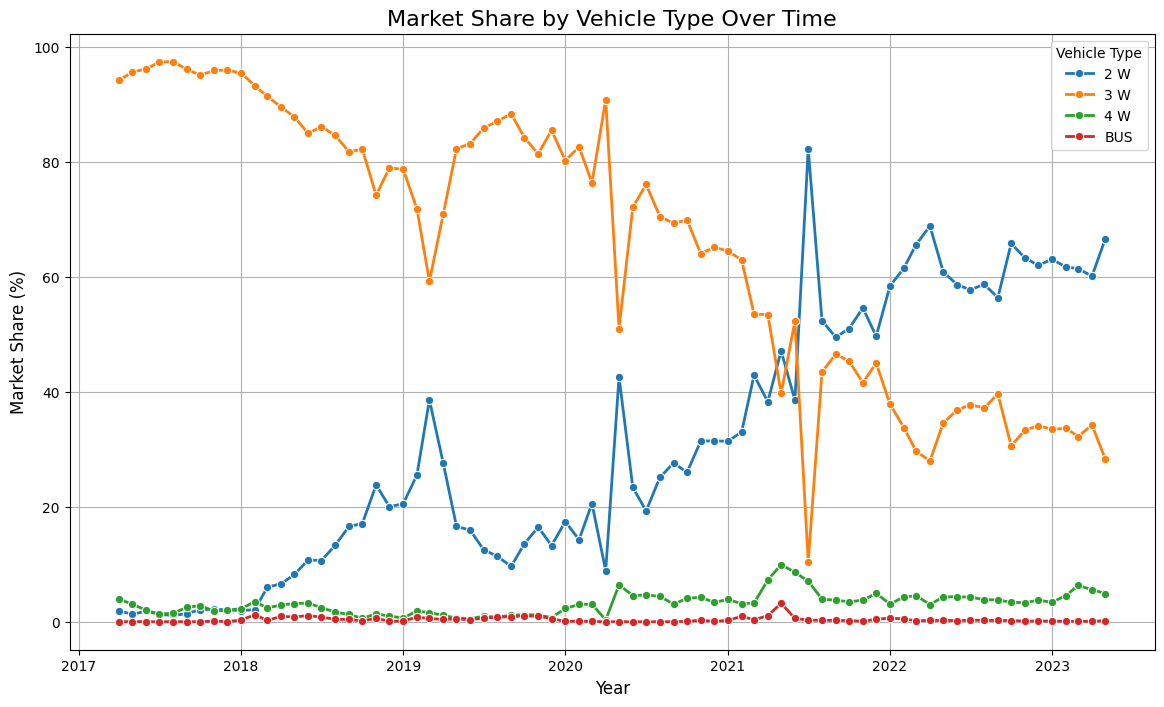

In [ ]:
## 2.3 Market Share of Each Vehicle Type Over Time
market_share = df[['2 W', '3 W', '4 W', 'BUS']].div(df['TOTAL'], axis=0) * 100
plt.figure(figsize=(14,8))
for column in market_share.columns:
    sns.lineplot(data=market_share[column], marker='o', linewidth=2, label=column)
plt.title('Market Share by Vehicle Type Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Market Share (%)', fontsize=12)
plt.legend(title='Vehicle Type')
plt.grid(True)
plt.show()


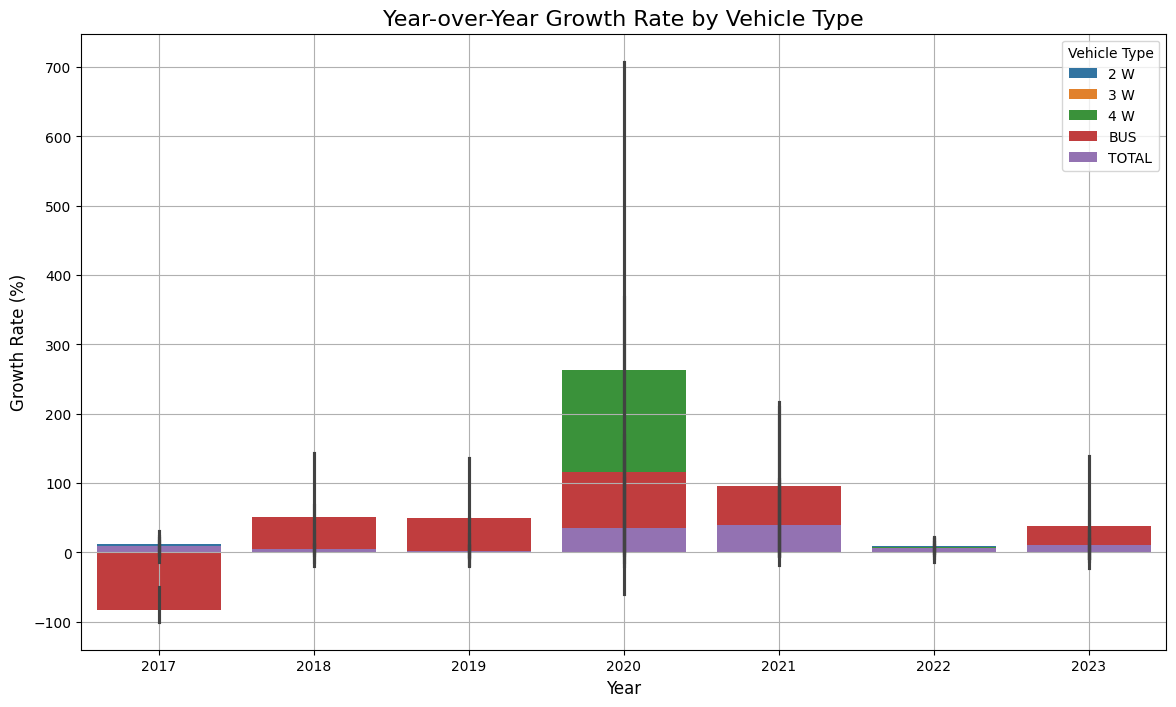

In [ ]:
## 2.4 Year-over-Year Growth Rate
growth_rate = df[['2 W', '3 W', '4 W', 'BUS', 'TOTAL']].pct_change() * 100
plt.figure(figsize=(14,8))
for column in growth_rate.columns:
    sns.barplot(x=growth_rate.index.year, y=growth_rate[column], label=column)
plt.title('Year-over-Year Growth Rate by Vehicle Type', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Growth Rate (%)', fontsize=12)
plt.legend(title='Vehicle Type')
plt.grid(True)
plt.show()

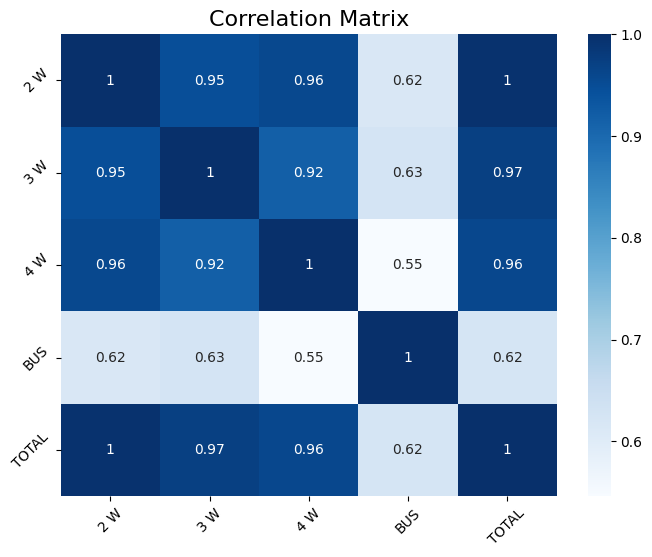

In [ ]:
# -------------------------------------------
# 3. Correlation Analysis
# -------------------------------------------

## 3.1 Correlation Matrix
corr_matrix = df[['2 W', '3 W', '4 W', 'BUS', 'TOTAL']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.title('Correlation Matrix', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()



Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.67 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=1588.439, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=1553.561, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=2.37 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=1586.598, Time=0.07 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=1548.607, Time=0.97 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=inf, Time=1.90 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=3.00 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=1523.449, Time=0.62 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=1525.849, Time=1.28 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=1542.003, Time=0.49 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=1525.344, Time=0.39 sec

Best model:  ARIMA(1,2,1)(0,0,0)[0] intercept
Total fit time: 12.929 seconds


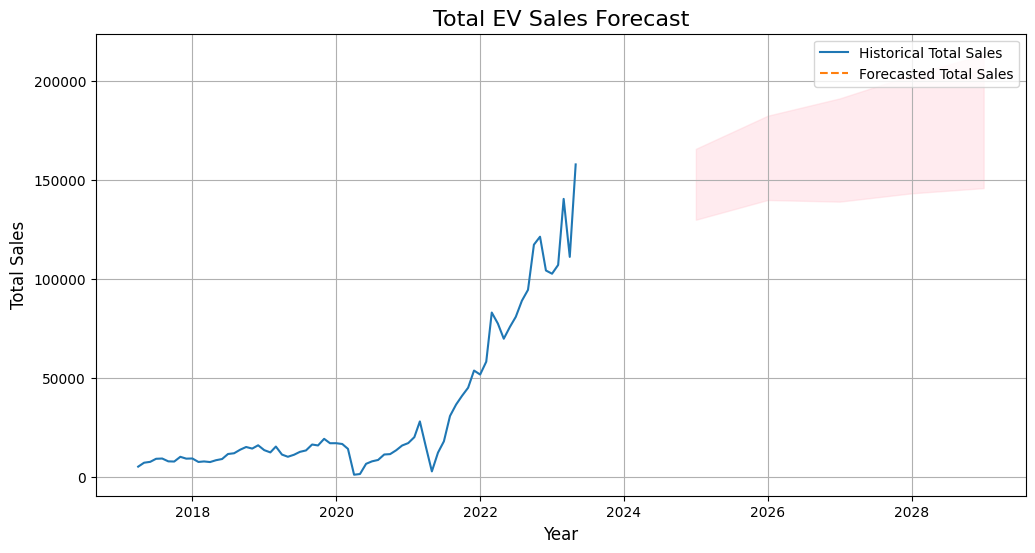

In [ ]:
# -------------------------------------------
# 4. Time Series Forecasting
# -------------------------------------------

## 4.1 Forecasting Total Sales using ARIMA
from pmdarima import auto_arima

# Fit ARIMA model
model = auto_arima(df['TOTAL'], seasonal=False, trace=True)
model.summary()

# Forecast for next 5 years
forecast_period = 5
forecast, conf_int = model.predict(n_periods=forecast_period, return_conf_int=True)
forecast_index = pd.date_range(start=df.index[-1] + pd.DateOffset(years=1), periods=forecast_period, freq='Y')
forecast_series = pd.Series(forecast, index=forecast_index)

# Plotting the forecast
plt.figure(figsize=(12,6))
plt.plot(df['TOTAL'], label='Historical Total Sales')
plt.plot(forecast_series, label='Forecasted Total Sales', linestyle='--')
plt.fill_between(forecast_series.index, conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.3)
plt.title('Total EV Sales Forecast', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
# -------------------------------------------
# 5. Simulated Demographic and Psychographic Segmentation
# -------------------------------------------

## 5.1 Simulate Demographic Data
np.random.seed(42)  # For reproducibility
num_samples = 1000
demographic_data = pd.DataFrame({
    'Age': np.random.randint(18, 70, size=num_samples),
    'Income': np.random.randint(20000, 200000, size=num_samples),
    'Gender': np.random.choice(['Male', 'Female', 'Other'], size=num_samples),
    'Vehicle_Type_Preference': np.random.choice(['2 W', '3 W', '4 W', 'BUS'], size=num_samples)
})

print("\nSimulated Demographic Data Preview:")
display(demographic_data.head())




Simulated Demographic Data Preview:


,Age,Income,Gender,Vehicle_Type_Preference
0,56,125186,Female,4 W
1,69,54674,Female,3 W
2,46,186926,Other,2 W
3,32,66271,Female,BUS
4,60,93688,Other,2 W


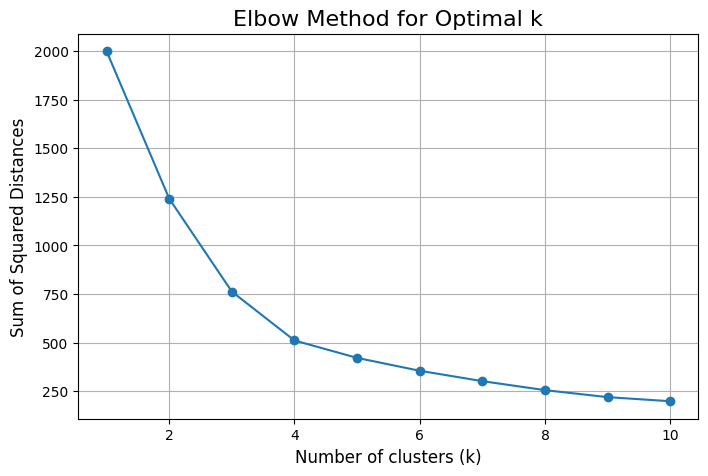

In [ ]:
## 5.2 K-Means Clustering
# Prepare data for clustering
clustering_features = demographic_data[['Age', 'Income']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(clustering_features)

# Determine optimal number of clusters using Elbow Method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal k', fontsize=16)
plt.xlabel('Number of clusters (k)', fontsize=12)
plt.ylabel('Sum of Squared Distances', fontsize=12)
plt.grid(True)
plt.show()

# From elbow plot, choose k=3
kmeans = KMeans(n_clusters=3, random_state=42)
demographic_data['Cluster'] = kmeans.fit_predict(scaled_features)

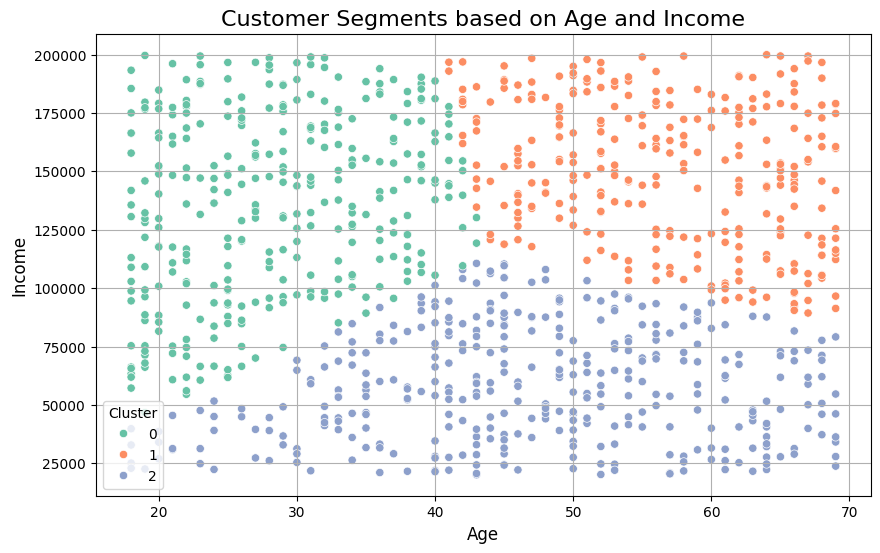


Cluster Characteristics:


Age                Income           Vehicle_Type_Preference
              mean median           mean    median                <lambda>
Cluster                                                                   
0        28.323263   28.0  136124.631420  140993.0                     2 W
1        56.760656   57.0  150643.603279  152632.0                     2 W
2        47.065934   47.0   57674.953297   55139.0                     4 W

In [ ]:
## 5.3 Visualize Clusters
plt.figure(figsize=(10,6))
sns.scatterplot(data=demographic_data, x='Age', y='Income', hue='Cluster', palette='Set2')
plt.title('Customer Segments based on Age and Income', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Income', fontsize=12)
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

## 5.4 Cluster Characteristics
cluster_summary = demographic_data.groupby('Cluster').agg({
    'Age': ['mean', 'median'],
    'Income': ['mean', 'median'],
    'Vehicle_Type_Preference': lambda x: x.value_counts().index[0]
})

print("\nCluster Characteristics:")
display(cluster_summary)


In [ ]:
# -------------------------------------------
# 6. Strategic Recommendations
# -------------------------------------------

print("\nStrategic Recommendations:")
print("1. **Market Focus**: Concentrate marketing efforts on customer segments identified in clusters with higher income and preference for 4 W vehicles, indicating potential for higher sales revenue.")
print("2. **Product Development**: Develop affordable and efficient 2 W and 3 W vehicles targeting younger demographics with lower income levels as identified in respective clusters.")
print("3. **Sales Forecasting**: Utilize the forecasting model to plan production and inventory for the next 5 years, ensuring supply meets the projected demand.")
print("4. **Marketing Strategy**: Tailor marketing messages to resonate with the psychographic profiles of each cluster, emphasizing aspects like eco-friendliness, cost savings, and modern technology.")
print("5. **Further Data Collection**: Invest in collecting real demographic and psychographic data to refine customer segmentation and enhance the accuracy of strategic planning.")
print("6. **Regional Expansion**: Analyze regional data (when available) to identify high-potential markets and plan targeted regional strategies accordingly.")


Strategic Recommendations:
1. **Market Focus**: Concentrate marketing efforts on customer segments identified in clusters with higher income and preference for 4 W vehicles, indicating potential for higher sales revenue.
2. **Product Development**: Develop affordable and efficient 2 W and 3 W vehicles targeting younger demographics with lower income levels as identified in respective clusters.
3. **Sales Forecasting**: Utilize the forecasting model to plan production and inventory for the next 5 years, ensuring supply meets the projected demand.
4. **Marketing Strategy**: Tailor marketing messages to resonate with the psychographic profiles of each cluster, emphasizing aspects like eco-friendliness, cost savings, and modern technology.
5. **Further Data Collection**: Invest in collecting real demographic and psychographic data to refine customer segmentation and enhance the accuracy of strategic planning.
6. **Regional Expansion**: Analyze regional data (when available) to identify hi